In [145]:
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams["figure.figsize"] = [16, 12]

In [188]:
FIELD_SIZE = (1, 1) # м

CHARGE_TO_MASS = 9.5787e7 # Кл / кг
B = np.array([0.1, 10, 1]) # Тл
B = np.array([0.1, 0, 1]) # Тл


START_POS = np.array([0, 0, 0]) # м 
START_V = np.array([5e4, 0, 0]) # м / c

DT = 1e-12 # с
T = 5e-7 # с

In [189]:
positions = np.empty((int(T // DT), 3))

positions[0] = START_POS

v = START_V

for i in range(int(T // DT) - 1):
    a = CHARGE_TO_MASS * np.cross(v, B)

    

    positions[i + 1] = (positions[i] + v * DT + a * DT ** 2 / 2)

    v = v + a * DT

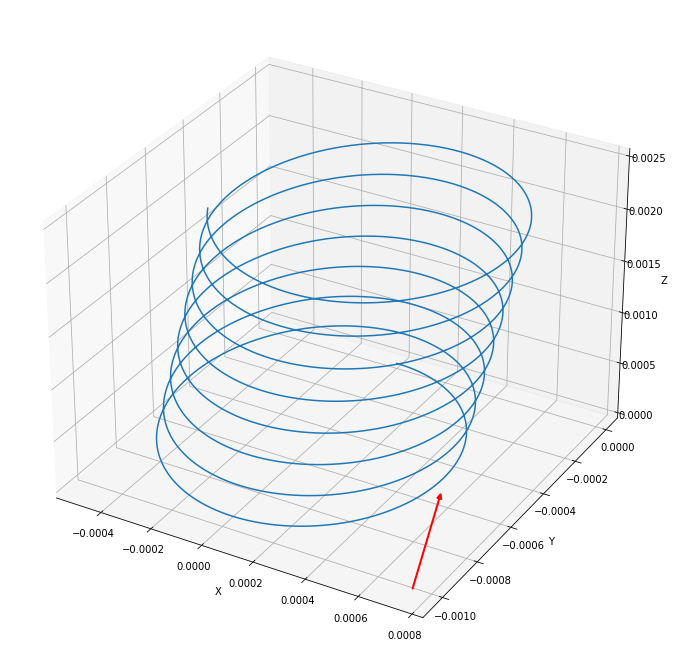

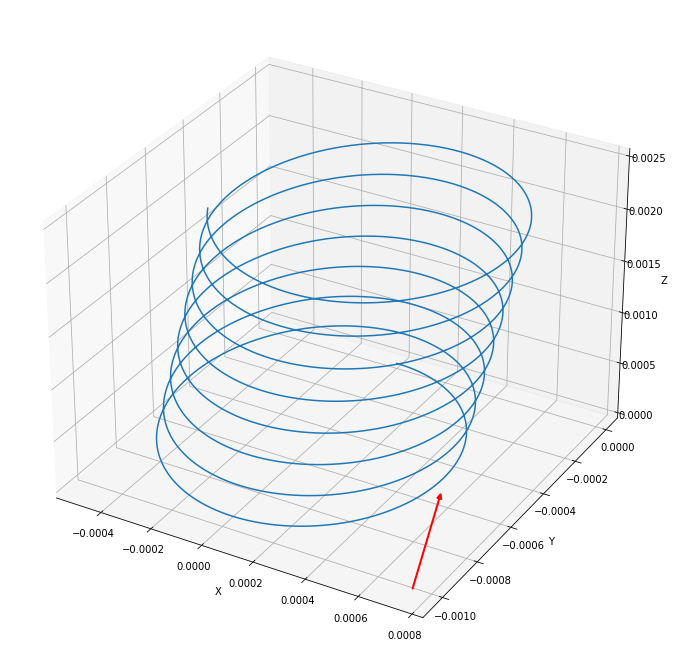

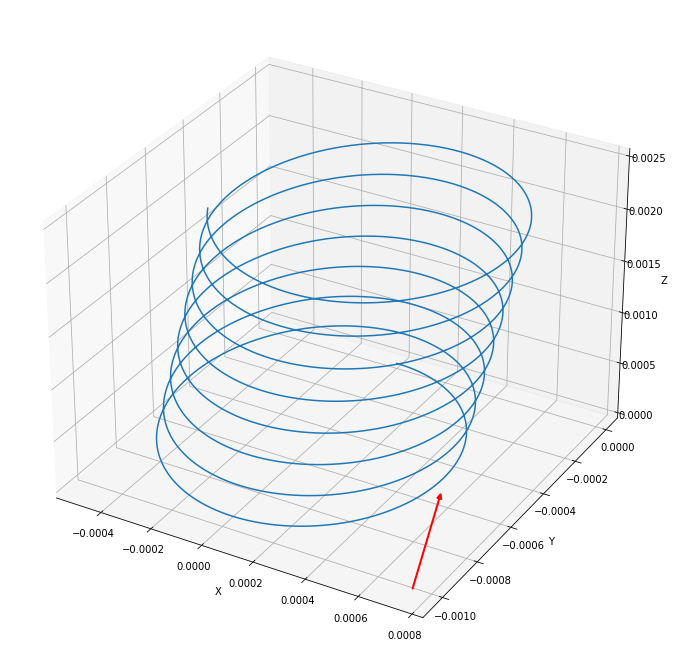

In [196]:
for i in range(3):
    import time
    fig = plt.figure()



    ax = plt.axes(projection='3d')
    ax.plot(positions[:, 0], positions[:, 1], positions[:, 2])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel("Z")

    b_scale = min(max(positions[:, 0]) - min(positions[:, 0]), max(positions[:, 1]) - min(positions[:, 1]), max(positions[:, 2]) - min(positions[:, 2])) / np.linalg.norm(B, 2) 

    a = Arrow3D([max(positions[:, 0]), max(positions[:, 0]) + B[0] * b_scale], [min(positions[:, 1]), min(positions[:, 1]) + B[1] * b_scale], 
                    [min(positions[:, 2]), min(positions[:, 2]) + B[2] * b_scale], mutation_scale=10, 
                    lw=2, arrowstyle="-|>", color="r")
    ax.add_artist(a)
    fig.show()



In [150]:
import numpy as np
from numpy import *
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)